# Question 4: Miniproject
----
### Cell type classification 

## 0. Setting 

In [261]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot

In [3]:
class_color = {'EXC':'k',
               'PV':'indianred',
               'VIP':'royalblue',
               'SST':'darkorange'} 
cell_class_order = ['EXC', 'PV', 'VIP', 'SST']

## 1. Data Extraction

In [ ]:
# Load data raw
main_dir = r'../' 
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'Figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'Data')
fname = 'data_bio482.pkl'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: ../


KeyboardInterrupt: 

## Cell properties

### PART0

In [7]:
data_df.head()

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."


In [9]:
# Cell ID
# We do have several data for the same cell but we don't need to distinguish them
data_df['Cell_ID']

0      SC901_1
1      SC901_1
2      SC901_1
3      SC901_1
4      SC901_1
        ...   
826    AP068_1
827    AP068_1
828    AP068_1
829    AP068_1
830    AP068_1
Name: Cell_ID, Length: 831, dtype: object

In [12]:
# Cell_Counter WTF??
data_df['Cell_Counter']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
826    1.0
827    1.0
828    1.0
829    1.0
830    1.0
Name: Cell_Counter, Length: 831, dtype: float64

In [13]:
# Cell_tdTomatoExpressing WTF??
data_df['Cell_tdTomatoExpressing'].value_counts()

Cell_tdTomatoExpressing
True     548
False    283
Name: count, dtype: int64

In [14]:
# Mouse Genotype WTF??
data_df['Mouse_Genotype'].value_counts()

Mouse_Genotype
Sst-Cre                              279
C57Bl6j                              199
PV-Cre                               184
VIP_IRES_Cre                          61
Scnn1a-Cre                            52
VIP-Cre                               35
B6(Cg)-Etv1<tm1.1(cre/ERT2)Zjh>/J     21
Name: count, dtype: int64

In [15]:
# keep :
# Properties 
part0 = data_df[['Cell_ID','Cell_Depth','Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type']]

In [16]:
# is cell anatomy the same as cell layer ? # TODO

In [17]:
# remove the nan in cell depth 
mask = np.isnan(part0.Cell_Depth)
mask = [not m for m in mask]
part0 = part0[mask]

# remove the pb in cell targetedBrain area 
part0 = part0[part0.Cell_TargetedBrainArea != 'C2?']

for col in ['Cell_Depth','Cell_Layer','Cell_TargetedBrainArea', 'Cell_Type'] : 
    print(part0[col].unique())

print(len(part0))

[229. 350. 550. 244. 250. 212. 140. 650. 335. 225. 198. 516. 500. 200.
 150. 190. 300. 160. 320. 170. 330. 348. 305. 396. 223. 197. 360. 340.
 560. 665. 551. 571. 586. 601. 496. 523. 432. 440. 266. 381. 156. 256.
 354. 215. 213. 357. 314. 219. 288. 439. 410. 470. 403. 341. 582. 531.
 557. 533. 607. 630. 337. 327. 437. 333. 220. 616. 568. 451. 450. 452.
 480. 445. 490. 474. 399. 292. 263. 135. 124. 120. 141. 164. 231. 387.
 427. 429. 491. 467. 529. 462. 364. 538. 547. 497. 476. 528. 507. 521.
 514. 457. 424. 477. 473. 456. 461. 147. 154. 102. 123. 235. 227.  98.
 146. 125. 155. 207. 143. 100. 126. 149. 152.  97. 245. 184. 172. 174.
 240. 338. 368. 400. 234. 374. 443. 423. 463. 375. 222. 211. 233. 436.
 448. 425. 525. 469. 460. 430. 415. 444. 449. 269. 185. 264. 435. 570.
 169. 167. 199. 434. 465. 390. 455. 481. 421. 204. 180. 351. 391. 380.
 122. 175. 110. 113. 128. 130. 153. 157. 145. 158. 188. 196. 192. 232.
 205. 216. 176. 210. 178. 208. 194.]
['L2/3' 'L5' 'L4']
['C2' 'S1']
['EXC' 'P

In [18]:
for col in part0.columns[1:] : 
    print(col, np.unique(part0[col].isna()))

Cell_Depth [False]
Cell_Layer [False]
Cell_TargetedBrainArea [False]
Cell_Type [False]


In [19]:
part0.rename(columns={'Cell_ID':'cell_id'}, inplace=True)
part0.rename(columns={'Cell_Type':'cell_type'}, inplace=True)

In [20]:
# Remove the duplicat 
part0 = part0.drop_duplicates()
part0 = part0.reset_index()

In [21]:
len(part0)

237

### part1

In [22]:
sweep_type = 'free whisking'
time_window = 2    # time window to analyze Vm (s)
freq_band_lim = [1, 10, 30, 90] # low- and high-frequency band limits (Hz)

data_df_subset = data_df[data_df['Sweep_Type']==sweep_type] 
all_cells = np.unique(data_df_subset.Cell_ID)

verbose=False #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], # required for cell-type identification
          # Data we'll collect for Part 1a
          'firing_rate': [], 
          'ap_threshold': [], 
          'ap_duration': [], 
          # Data we'll collect for Part 1b
          'mean_vm':[],
          'std_vm':[],
          'fft_low':[],
          'fft_high':[]
        }

result_fft_cell_type = {'EXC':[],'SST':[], 'VIP':[],'PV':[]}

exc_cell_counter = 0

# Iterate over each cell identities to collect desired data
cell_list = sorted(np.unique(data_df_subset.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content
for idx, cell in enumerate(cell_list):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration = 0
    tot_number_ap = 0
    
    # Initialize empty lists to get data for each trial/sweep
    # Part 1a
    tot_ap_thresh = []
    tot_ap_duration = []
    # Part 1b
    tot_mean_vm = []
    tot_std_vm = []
    tot_fft = []
    
    # For that cell, iterate over trials
    for trial in trial_list:
        #if idx % 100 == 0: # print every 100 iteration  
            #print('Cell {},  trial {}'.format(cell, int(trial)))
        if cell_type == 'EXC':
            exc_cell_counter += 1
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
          
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

            #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            
            vm_sub = membrane_potential.copy()

        # Once Vm_sub is obtained:
        # Compute subthreshold Vm mean and standard deviation
        mean_vm, std_vm = Function_SubThrsVm(vm_sub, sr_vm, trial_rec_duration)
        
        # Compute trial FFT
        fft = Function_Compute_FFTs(vm_sub, sr_vm, time_window)
        
        #Update current variables from the current trial
        # Part 1a
        tot_ap_thresh += [np.concatenate([ap_thresh_vm])]
        tot_ap_duration += [ap_duration]
        # Part 1b
        tot_mean_vm += [mean_vm]
        tot_std_vm += [std_vm]
        tot_fft +=  [fft]
        
        # Optional plotting: show AP and AP peak times
        ap_peak_index=np.round(ap_peak_times * sr_vm)  
        if verbose:
            fig, ax = plt.subplots(1,1, figsize=(10,2), dpi=300)
            remove_top_right_frame(ax)
            ax.set_title('Cell {},  trial {}'.format(cell, int(trial)))
            ax.plot(membrane_potential, lw=0.5,  zorder=0)
            ax.scatter(ap_peak_index, ap_peak_vm, lw=0.5, marker='+', color='r')
            ax.set_xlabel('Time (samples)')
            ax.set_ylabel('Membrane \n potential (V)')
            plt.show()

    # Once iterated over all trials for that cell, append cell data lists to the result dictionary
  
    # Part 1a
    result_dict['firing_rate'] += [tot_number_ap / tot_rec_duration] # <- just the firing rate formula
    result_dict['ap_threshold'] += [np.nanmean(np.concatenate(tot_ap_thresh))] #<-concatenate trials, get trial-average
    result_dict['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]

    
    # Part 1b
    result_dict['mean_vm'] += [np.nanmean(np.concatenate(tot_mean_vm))]
    result_dict['std_vm'] += [np.nanmean(np.concatenate(tot_std_vm))]
    
    # Compute mean FFT over trials
    tot_fft = np.nanmean(np.concatenate(tot_fft, axis=1), 1)
    #Store mean cell FFT
    result_fft_cell_type[cell_type] += [tot_fft] 
    
    # We need to find which point (sample) in the FFT correspond to which frequency
    pt1 = int(freq_band_lim[0] * fft.shape[0] / (sr_vm/2) ) + 1 #1Hz into FFT point
    pt2 = int(freq_band_lim[1] * fft.shape[0] / (sr_vm/2) ) + 1 #int: slicing requires integers
    result_dict['fft_low'] += [tot_fft[pt1:pt2].mean()]
    
    pt3 = int(freq_band_lim[2] * fft.shape[0] / (sr_vm/2) ) + 1
    pt4 = int(freq_band_lim[3] * fft.shape[0] / (sr_vm/2) ) + 1 
    result_dict['fft_high'] += [tot_fft[pt3:pt4].mean()]

## Convert each dictionary lists as numpy arrays (convenient to make dataframes)
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

print('Done!')

Cell 0/232
Cell 100/232


/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))
/tmp/ipykernel_127353/1589681479.py:136: RuntimeWarning: Mean of empty slice
  result_dict['ap_duration'] += [np.nanmean(np.concatenate(tot_ap_duration))]


Cell 200/232


/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal


Done!


In [23]:
part1 = pd.DataFrame(result_dict)
part1.head()

,cell_id,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high
0,AP032_1,EXC,0.875000,-0.040795,0.608929,-0.064378,0.005948,0.000763,0.000070
1,AP032_2,EXC,1.857143,-0.040812,0.993269,-0.056189,0.005208,0.000635,0.000090
2,AP035_1,EXC,2.100000,-0.037562,0.786111,-0.058273,0.006374,0.000775,0.000053
3,AP035_2,EXC,0.900000,-0.031695,0.849537,-0.055222,0.006061,0.000837,0.000069
4,AP039_1,EXC,0.566667,-0.040215,0.866176,-0.060517,0.004220,0.000513,0.000054


In [24]:
# remove the cell type 
part1 = part1.drop(columns = 'cell_type')

### part2

In [25]:
sweep_type = 'free whisking'

pre_window = 0.5 # time before whisking onset (s)
post_window = 0.5 # time after whisking onset (s)
min_event_dur = 0.2 # minimal duration of whisking episode to be considered
min_iti = 0.5 # minimal intertrial interval (ITI) between 2 consecutive whisking episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.05 # bin size for psth (s)
epoch_bounds = {'pre':[-0.5, -0.3],
                  'post':[0,0.2]}  # time boundaries to compute changes in whisker protraction (WP), or Vmverbose=0 #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], 
          # This is a template, an example with whisker protraction
          'numb_events': [],
          'wp_avg': [],
          'wp_amplitude_pre': [],
          'wp_amplitude_post': [],
          # Sub. Vm
          'vm_avg': [], 
          'vm_amplitude_pre': [],
          'vm_amplitude_post': [],
          # Firing rates
          'ap_avg':[],
          'ap_psth':[],
          'ap_fr_pre':[],
          'ap_fr_post':[]
        }
    
# Iterate over each cell identities to collect desired data
for idx, cell in enumerate(np.unique(data_df_subset.Cell_ID)):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration=0
    tot_number_ap=0
    
    # Initialize empty lists to get data for each trial/sweep
    tot_ap_thresh = []
    tot_ap_duration= []
    
    # Template
    tot_wp_events = []
    
    # Vm and AP FR
    tot_vm_events = []
    tot_ap_events = []
    
    ## For that cell, iterate over trials
    for trial in trial_list:
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get event times for that trial
        event_times = cell_trial_df['Sweep_WhiskingTimes'].values[0]

        if event_times is None: # skip when there are no events
            continue
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Template: extract whisker angle and sampling rate of whisker video data
        whisker_angle = cell_trial_df['Sweep_WhiskerAngle'].values[0]
        sr_wp = cell_trial_df['Sweep_WhiskerAngle_SamplingRate'].values[0]
        
         # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
        
                
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

             #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            #For APs, make an analog binary vector of same dimensions as Vm_Sub
            vec_length = len(vm_sub)
            ap_vect = Function_Times2Vect(ap_peak_times, sr_vm, vec_length)
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            vm_sub = membrane_potential.copy()
            ap_vect = np.zeros_like(vm_sub) #empty vector of size Vm_Sub
            
        # Once trial event times and data is collected, use this function to extract data aligned to event onset
        # -> check function (Function_Event_Triggered_Signal) parameters and code!
        # -> input data can be whatever, given a certain dimensions
        # -> events can be whatever
        # -> adjust sampling rate for data type (e.g. video, Vm)! 
        
        wp_event = Function_Event_Triggered_Signal(whisker_angle, sr_wp, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        vm_event = Function_Event_Triggered_Signal(vm_sub, sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        ap_event = Function_Event_Triggered_Signal(np.squeeze(ap_vect), sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)


        # Missing data in original .mat file is encoded as -1, so this skips entires with missing data
        if type(wp_event) == int:
            continue
        if type(vm_event) == int:
            continue
        if type(ap_event) == int:
            continue
                 
        # Append each event-triggered vector and stack to an array 
        tot_wp_events += [wp_event]
        tot_wp_array = np.hstack(tot_wp_events)
        
        tot_vm_events+= [vm_event]
        tot_vm_array=np.hstack(tot_vm_events)
        
        tot_ap_events+= [ap_event]
        tot_ap_array=np.hstack(tot_ap_events)
        

    # Compute means only if a certain number of trials is present
    n_events = tot_wp_array.shape[1]
    if (n_events >= min_number_trials):
        result_dict['numb_events'] += [n_events] 
        
        # Calculate trial-averaged signals
        #Template: WP
        wp_avg = np.mean(tot_wp_array, 1) 
        result_dict['wp_avg'] += [wp_avg] #add for that cell
        
        vm_avg = np.mean(tot_vm_array, 1) 
        result_dict['vm_avg'] += [vm_avg]
        
        ap_avg = np.mean(tot_ap_array, 1) 
        result_dict['ap_avg'] += [ap_avg]
        
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        
        #for epoch in range(wp_bounds.shape[0]): 
        for epoch in epoch_bounds.keys():
            
            # Template: whisker protraction
            # Get bound of that epoch (pre/post)
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_wp))
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_wp-1))
            
            #Get mean in pre/post epoch
            if epoch=='pre':
                result_dict['wp_amplitude_pre'] += [wp_avg[bound_1:bound_2].mean(0)]
            else:
                result_dict['wp_amplitude_post'] += [wp_avg[bound_1:bound_2].mean(0)]
                
            # Vm, and AP firing rate
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_vm)) #sr_vm !
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_vm-1))
            
            if epoch=='pre':
                result_dict['vm_amplitude_pre'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in mV!
                result_dict['ap_fr_pre'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]       #in Hz!
            else:
                result_dict['vm_amplitude_post'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in Hz!
                result_dict['ap_fr_post'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]
                
                
    #If there are less trials than necessary, set to NaNs (exclude data)
    else:
        result_dict['numb_events'] += [n_events]
        
        #Template: WP
        wp_avg=np.nan*np.empty_like(wp_avg)
        result_dict['wp_avg'] += [wp_avg]
        result_dict['wp_amplitude_pre'] += [np.nan]
        result_dict['wp_amplitude_post'] += [np.nan]
        
        # VM
        vm_avg=np.nan*np.empty_like(vm_avg)
        result_dict['vm_avg'] += [vm_avg]
        result_dict['vm_amplitude_pre'] += [np.nan]
        result_dict['vm_amplitude_post'] += [np.nan]
        
        #AP firing rate
        ap_avg=np.nan*np.empty_like(ap_avg)
        result_dict['ap_avg'] += [ap_avg]
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        result_dict['ap_fr_pre'] += [np.nan]
        result_dict['ap_fr_post'] += [np.nan]

                         
# Convert each dictionary lists as numpy arrays
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

#Init. dataframe size
result_df = pd.DataFrame(index=range(np.unique(data_df_subset.Cell_ID).shape[0]),
             columns=result_dict.keys())

for key in result_dict.keys():
    result_df[key] = result_dict[key] #this works for scalars
    
# For array-based data, one must give a list to assign to dataframe column
# Template: WP
result_df['wp_avg'] = list(result_dict['wp_avg'])

result_df['vm_avg'] = list(result_dict['vm_avg'])
result_df['ap_avg'] = list(result_dict['ap_avg'])
result_df['ap_psth'] = list(result_dict['ap_psth'])

# times for the bins of the psth
psth_time=ap_psth[:,0]

print('Done!')

Cell 0/232


/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal
/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))


Cell 100/232
Cell 200/232
Done!


In [26]:
# keep wp_amplitude_pre, wp_amplitude_post, vm_amplitude_pre, vm_amplitude_post, ap_fr_pre, ap_fr_post
part2 = result_df[['cell_id', 'cell_type', 'wp_amplitude_pre','wp_amplitude_post', 'vm_amplitude_pre', 'vm_amplitude_post', 'ap_fr_pre', 'ap_fr_post' ]]
part2.head()

,cell_id,cell_type,wp_amplitude_pre,wp_amplitude_post,vm_amplitude_pre,vm_amplitude_post,ap_fr_pre,ap_fr_post
0,AP032_1,PV,-139.536777,-135.226516,-55.504155,-55.399560,23.241104,27.065590
1,AP032_2,PV,-139.157622,-134.807553,-48.994021,-50.584425,30.007502,8.752188
2,AP035_1,PV,-131.406960,-125.811327,-54.334653,-59.056842,24.381095,7.501875
3,AP035_2,PV,-132.794568,-118.696745,-50.060496,-53.241710,39.176461,19.588230
4,AP039_1,SST,-146.466663,-138.432118,-57.928339,-62.284089,0.000000,0.000000


In [27]:
# Add to the columns the label for the exp
part2.columns += '_FW'
part2.rename(columns={'cell_id_FW':'cell_id'}, inplace=True)

/tmp/ipykernel_127353/3503326707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part2.rename(columns={'cell_id_FW':'cell_id'}, inplace=True)


In [28]:
part2 = part2.drop(columns = 'cell_type_FW')

### Part3

In [29]:
sweep_type = 'active touch'

pre_window = 0.1 # time before touch onset (s)
post_window = 0.3 # time after touch onset (s)
min_event_dur = 0 # minimal duration of active touch episode to be considered
min_iti = 0.2 # minimal intertrial interval (ITI) between 2 consecutive touch episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.01 # bin size for psth (s)
epoch_bounds = {'pre':[-0.05, 0],
                  'post':[0,0.1]}  # time boundaries to compute changes in whisker protraction (WP), or Vm


data_df_subset = data_df[data_df['Sweep_Type']==sweep_type] 
all_cells = np.unique(data_df_subset.Cell_ID)

verbose=0 #set to 0 to hide individual AP plots

# Initialize a dictionary to store data for all cell
result_dict = {'cell_id': all_cells, 
          'cell_type':[], 
          # This is a template, an example with whisker protraction
          'numb_events': [],
          'wp_avg': [],
          'wp_amplitude_pre': [],
          'wp_amplitude_post': [],
          # Sub. Vm
          'vm_avg': [], 
          'vm_amplitude_pre': [],
          'vm_amplitude_post': [],
          # Firing rates
          'ap_avg':[],
          'ap_psth':[],
          'ap_fr_pre':[],
          'ap_fr_post':[]
        }
    
# Iterate over each cell identities to collect desired data
for idx, cell in enumerate(np.unique(data_df_subset.Cell_ID)):
    if idx%100==0:
        print('Cell {}/{}'.format(idx, np.unique(data_df_subset.Cell_ID).shape[0]))
    
    # Get mouse name and cell number from cell identifier
    mouse = cell.split('_')[0]
    cell_count = float(cell.split('_')[1])
    
    # Get data subset for that cell
    cell_df = data_df_subset[data_df_subset.Cell_ID==cell]
    
    # Get cell type 
    cell_type = cell_df.Cell_Type.values[0]
    result_dict['cell_type'] += [cell_type]
    
    # Get sweeps/trials recorded for that cell, that we are going to iterate over
    trial_list = cell_df.Sweep_Counter.values
    
    # Init. cell recording specific quantities: a unique duration, yielding a unique number of APs
    tot_rec_duration=0
    tot_number_ap=0
    
    # Initialize empty lists to get data for each trial/sweep
    tot_ap_thresh = []
    tot_ap_duration= []
    
    # Template
    tot_wp_events = []
    
    # Vm and AP FR
    tot_vm_events = []
    tot_ap_events = []
    
    ## For that cell, iterate over trials
    for trial in trial_list:
        
        # Get current trial data
        cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]
        
        # Get event times for that trial
        event_times = cell_trial_df['Sweep_ActiveContactTimes'].values[0]
        if np.isnan(event_times).all(): #if no active touch events, just skip
            continue
        
        # Get the sampling rate and membrane potential (and derivative) from that sweep
        sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
        membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
        # Template: extract whisker angle and sampling rate of whisker video data
        whisker_angle = cell_trial_df['Sweep_WhiskerAngle'].values[0]
        sr_wp = cell_trial_df['Sweep_WhiskerAngle_SamplingRate'].values[0]
        
         # Get and update recording duration for that cell by adding trial duration
        trial_rec_duration = len(membrane_potential)/sr_vm
        tot_rec_duration += trial_rec_duration
        
        # Detection of action potentials for that trial, and update total number of APs for that cell
        #ap_params = None
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
        tot_number_ap += ap_params.shape[0]
        
                
        # Check if this trial contains any AP...
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

             #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
            #For APs, make an analog binary vector of same dimensions as Vm_Sub
            vec_length = len(vm_sub)
            ap_vect = Function_Times2Vect(ap_peak_times, sr_vm, vec_length)
            
            
        # Else if no AP, subthreshold Vm is just Vm
        else:
            vm_sub = membrane_potential.copy()
            ap_vect = np.zeros_like(vm_sub) #empty vector of size Vm_Sub
            
        # Once trial event times and data is collected, use this function to extract data aligned to event onset
        # -> check function (Function_Event_Triggered_Signal) parameters and code!
        # -> input data can be whatever, given a certain dimensions
        # -> events can be whatever
        # -> adjust sampling rate for data type (e.g. video, Vm)! 
        
        wp_event = Function_Event_Triggered_Signal(whisker_angle, sr_wp, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        vm_event = Function_Event_Triggered_Signal(vm_sub, sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)
        ap_event = Function_Event_Triggered_Signal(np.squeeze(ap_vect), sr_vm, 
                                                   event_times, pre_window, post_window, min_event_dur, min_iti)


        
        #if type(wp_event) == int:
        #    continue
        #if type(vm_event) == int:
        #    continue
        #if type(ap_event) == int:
        #    continue
                 
        # Append each event-triggered vector and stack to an array 
        tot_wp_events += [wp_event]
        tot_wp_array = np.hstack(tot_wp_events)
        
        tot_vm_events+= [vm_event]
        tot_vm_array=np.hstack(tot_vm_events)
        
        tot_ap_events+= [ap_event]
        tot_ap_array=np.hstack(tot_ap_events)
        

    # Compute means only if a certain number of trials is present
    n_events = tot_wp_array.shape[1]
    if (n_events >= min_number_trials):
        result_dict['numb_events'] += [n_events] 
        
        # Calculate trial-averaged signals
        #Template: WP
        wp_avg = np.mean(tot_wp_array, 1) 
        result_dict['wp_avg'] += [wp_avg] #add for that cell
        
        vm_avg = np.mean(tot_vm_array, 1) 
        result_dict['vm_avg'] += [vm_avg]
        
        ap_avg = np.mean(tot_ap_array, 1) 
        result_dict['ap_avg'] += [ap_avg]
        
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        
        #for epoch in range(wp_bounds.shape[0]): 
        for epoch in epoch_bounds.keys():
            
            # Template: whisker protraction
            # Get bound of that epoch (pre/post)
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_wp))
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_wp-1))
            
            #Get mean in pre/post epoch
            if epoch=='pre':
                result_dict['wp_amplitude_pre'] += [wp_avg[bound_1:bound_2].mean(0)]
            else:
                result_dict['wp_amplitude_post'] += [wp_avg[bound_1:bound_2].mean(0)]
                
            # Vm, and AP firing rate
            bound_1=int(np.round((epoch_bounds[epoch][0]+pre_window)*sr_vm)) #sr_vm !
            bound_2=int(np.round((epoch_bounds[epoch][1]+pre_window)*sr_vm-1))
            
            if epoch=='pre':
                result_dict['vm_amplitude_pre'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in mV!
                result_dict['ap_fr_pre'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]       #in Hz!
            else:
                result_dict['vm_amplitude_post'] += [vm_avg[bound_1:bound_2].mean(0) * 1000] #in Hz!
                result_dict['ap_fr_post'] += [ap_avg[bound_1:bound_2].mean(0) * sr_vm]
                
                
    #If there are less trials than necessary, set to NaNs (exclude data)
    else:
        result_dict['numb_events'] += [n_events]
        
        #Template: WP
        wp_avg=np.nan*np.empty_like(wp_avg)
        result_dict['wp_avg'] += [wp_avg]
        result_dict['wp_amplitude_pre'] += [np.nan]
        result_dict['wp_amplitude_post'] += [np.nan]
        
        # VM
        vm_avg=np.nan*np.empty_like(vm_avg)
        result_dict['vm_avg'] += [vm_avg]
        result_dict['vm_amplitude_pre'] += [np.nan]
        result_dict['vm_amplitude_post'] += [np.nan]
        
        #AP firing rate
        ap_avg=np.nan*np.empty_like(ap_avg)
        result_dict['ap_avg'] += [ap_avg]
        ap_psth=Function_PSTH(ap_avg, sr_vm, pre_window, post_window, bin_size)
        result_dict['ap_psth'] += [ap_psth[:,1]]
        result_dict['ap_fr_pre'] += [np.nan]
        result_dict['ap_fr_post'] += [np.nan]

                         
# Convert each dictionary lists as numpy arrays
result_dict = {key: np.array(result_dict[key]) for key in result_dict.keys()}

#Init. dataframe size
result_df = pd.DataFrame(index=range(np.unique(data_df_subset.Cell_ID).shape[0]),
             columns=result_dict.keys())

for key in result_dict.keys():
    result_df[key] = result_dict[key] #this works for scalars
    
# For array-based data, on must give a list to assign to dataframe column
# Template: WP
result_df['wp_avg'] = list(result_dict['wp_avg'])

result_df['vm_avg'] = list(result_dict['vm_avg'])
result_df['ap_avg'] = list(result_dict['ap_avg'])
result_df['ap_psth'] = list(result_dict['ap_psth'])

# times for the bins of the psth
psth_time=ap_psth[:,0]

print('Done!')

Cell 0/134


/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:52: RuntimeWarning: invalid value encountered in divide
  sAP_OnOff = np.diff(np.divide(sAP_Seg, np.abs(sAP_Seg)))  # compute the binary signal


Cell 100/134


/mnt/c/Users/ricar/OneDrive/cours/epfl/sv/MA3/neuroscience_cellular and circuit mecanism/BIO482_MiniProject_2023_Python/BIO482-miniproject/scripts/helpers.py:18: RuntimeWarning: invalid value encountered in divide
  AP_Thrs_Onset = np.diff(np.divide(Vm_Deriv - Vm_Deriv_Thrs, np.abs(Vm_Deriv - Vm_Deriv_Thrs)))


Done!


In [30]:
part3 = result_df[['cell_id', 'cell_type', 'wp_amplitude_pre','wp_amplitude_post', 'vm_amplitude_pre', 'vm_amplitude_post', 'ap_fr_pre', 'ap_fr_post' ]]
part3.head()

,cell_id,cell_type,wp_amplitude_pre,wp_amplitude_post,vm_amplitude_pre,vm_amplitude_post,ap_fr_pre,ap_fr_post
0,JP902_1,EXC,1.313173,4.325349,-57.048425,-58.194868,0.000000,0.000000
1,JP903_1,EXC,6.090980,11.033949,-68.167575,-66.258805,0.800801,0.000000
2,JP905_1,EXC,7.643778,10.227399,-55.262389,-54.555092,1.540002,0.769616
3,JP906_1,EXC,-4.364575,-0.040696,-55.650343,-48.444484,0.588824,4.708236
4,JP907_1,EXC,-5.679912,-1.912861,-53.102919,-53.095735,0.000000,0.000000


In [31]:
# Add a column for the exp label
part3.columns += '_AT'
part3.rename(columns={'cell_id_AT':'cell_id'}, inplace=True)

/tmp/ipykernel_127353/1554253047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3.rename(columns={'cell_id_AT':'cell_id'}, inplace=True)


In [32]:
part3 = part3.drop(columns = 'cell_type_AT')

### MERGING

In [33]:
merged = pd.merge(part0, part1,  on='cell_id', how='outer')
merged = merged.drop(columns ='index')

merged = pd.merge(merged, part2,  on='cell_id', how='outer')

merged = pd.merge(merged, part3, on='cell_id', how='outer')
merged.head()

,cell_id,Cell_Depth,Cell_Layer,Cell_TargetedBrainArea,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,...,vm_amplitude_pre_FW,vm_amplitude_post_FW,ap_fr_pre_FW,ap_fr_post_FW,wp_amplitude_pre_AT,wp_amplitude_post_AT,vm_amplitude_pre_AT,vm_amplitude_post_AT,ap_fr_pre_AT,ap_fr_post_AT
0,AP032_1,158.0,L2/3,C2,PV,0.875000,-0.040795,0.608929,-0.064378,0.005948,...,-55.504155,-55.399560,23.241104,27.065590,NaN,NaN,NaN,NaN,NaN,NaN
1,AP032_2,NaN,NaN,NaN,NaN,1.857143,-0.040812,0.993269,-0.056189,0.005208,...,-48.994021,-50.584425,30.007502,8.752188,NaN,NaN,NaN,NaN,NaN,NaN
2,AP035_1,188.0,L2/3,C2,PV,2.100000,-0.037562,0.786111,-0.058273,0.006374,...,-54.334653,-59.056842,24.381095,7.501875,NaN,NaN,NaN,NaN,NaN,NaN
3,AP035_2,196.0,L2/3,C2,PV,0.900000,-0.031695,0.849537,-0.055222,0.006061,...,-50.060496,-53.241710,39.176461,19.588230,NaN,NaN,NaN,NaN,NaN,NaN
4,AP039_1,160.0,L2/3,C2,SST,0.566667,-0.040215,0.866176,-0.060517,0.004220,...,-57.928339,-62.284089,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
len(merged)

240

In [35]:
# The merge works 
# check if we have nan cell id 
print(merged['cell_id'].isna().unique())

# check if we have twice the same cell 
for index, values in zip(merged['cell_id'].value_counts().index, merged['cell_id'].value_counts().values):
    if values !=1 : 
        print(merged[merged['cell_id']== index])

[False]


In [36]:
# Replace missing values by the mean of the cell type 
col_to_check = []
for col in merged.columns : 
    if len(np.unique(merged[col].isna())) == 2 : 
        col_to_check.append(col)

# Fill the missing value by the mean of the same cell type
for col in  col_to_check : 
    nanvalues_type = merged['cell_type'][merged.isna()[col]]
    print(col)

    for id, type_cell in zip(nanvalues_type.index, nanvalues_type.values) : 
        value_mean = merged[merged['cell_type'] == type_cell][col].mean()
        merged.at[id, col] = value_mean

Cell_Depth
Cell_Layer
Cell_TargetedBrainArea
cell_type
firing_rate
ap_threshold
ap_duration
mean_vm
std_vm
fft_low
fft_high
wp_amplitude_pre_FW
wp_amplitude_post_FW
vm_amplitude_pre_FW
vm_amplitude_post_FW
ap_fr_pre_FW
ap_fr_post_FW
wp_amplitude_pre_AT
wp_amplitude_post_AT
vm_amplitude_pre_AT
vm_amplitude_post_AT
ap_fr_pre_AT
ap_fr_post_AT


In [37]:
# only 3 values we can remove them because we cannot replace them 
for col in ['Cell_Depth', 'Cell_Layer', 'Cell_TargetedBrainArea', 'cell_type'] : 
    id = merged[merged[col].isna()].index
    merged = merged.drop(id)


In [38]:
# sanity check : 
for col in merged.columns[1:] : 
    print(np.unique(merged[col].isna()))

[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]
[False]


In [45]:
# path to save
path = os.path.join(f'{main_dir}Data/data.csv')
merged.to_csv(path)

## 2. Exploration

In [1]:
import os, sys
import pandas as pd
import numpy as np
main_dir='../'
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)
#data
data = pd.read_csv(f'{main_dir}Data/data.csv')

In [4]:
data = data.drop(columns = 'Unnamed: 0')
data.head()

,cell_id,Cell_Depth,Cell_Layer,Cell_TargetedBrainArea,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,...,vm_amplitude_pre_FW,vm_amplitude_post_FW,ap_fr_pre_FW,ap_fr_post_FW,wp_amplitude_pre_AT,wp_amplitude_post_AT,vm_amplitude_pre_AT,vm_amplitude_post_AT,ap_fr_pre_AT,ap_fr_post_AT
0,AP032_1,158.0,L2/3,C2,PV,0.875000,-0.040795,0.608929,-0.064378,0.005948,...,-55.504155,-55.399560,23.241104,27.065590,193.537640,199.918717,-50.443263,-47.847680,34.457937,78.611121
1,AP035_1,188.0,L2/3,C2,PV,2.100000,-0.037562,0.786111,-0.058273,0.006374,...,-54.334653,-59.056842,24.381095,7.501875,193.537640,199.918717,-50.443263,-47.847680,34.457937,78.611121
2,AP035_2,196.0,L2/3,C2,PV,0.900000,-0.031695,0.849537,-0.055222,0.006061,...,-50.060496,-53.241710,39.176461,19.588230,193.537640,199.918717,-50.443263,-47.847680,34.457937,78.611121
3,AP039_1,160.0,L2/3,C2,SST,0.566667,-0.040215,0.866176,-0.060517,0.004220,...,-57.928339,-62.284089,0.000000,0.000000,191.997949,199.756400,-52.285500,-51.649055,8.013646,18.354518
4,AP039_2,176.0,L2/3,C2,SST,1.274725,-0.039683,0.766810,-0.064438,0.005904,...,-49.709697,-54.663019,5.001250,1.154135,191.997949,199.756400,-52.285500,-51.649055,8.013646,18.354518


#### Corelation between features 

In [3]:
# all correlation 
sns.pairplot(data, hue='cell_type', palette=class_color)

NameError: name 'class_color' is not defined

#### Correlation between the two studies AT , FW  

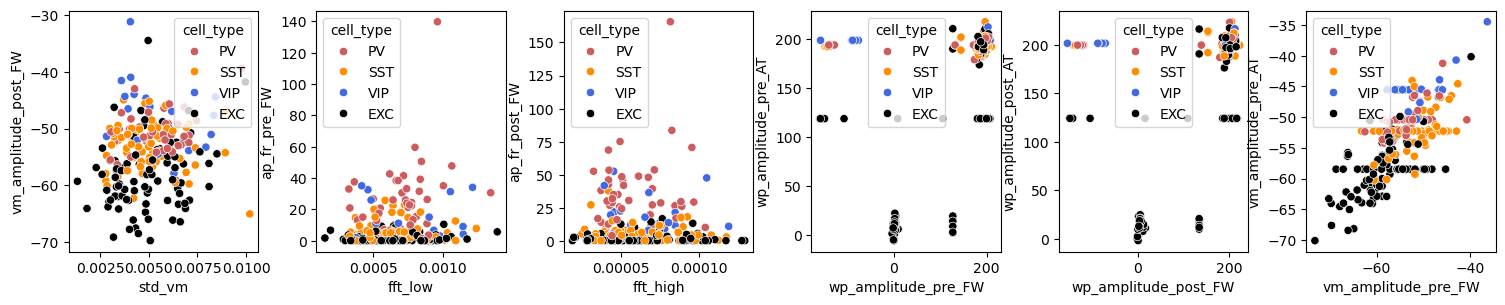

In [49]:
fig, ax = plt.subplots(1, 6, figsize=(15, 3))
fig.tight_layout()
for i in range(6) :
    sns.scatterplot(x =data.iloc[:,9+i],  y=data.iloc[:,15+i], hue = data['cell_type'], ax= ax[i], palette=class_color)
    ax[i].set_xlabel(data.columns[9+i])
    ax[i].set_ylabel(data.columns[15+i])


#### boxplot to assess the variability

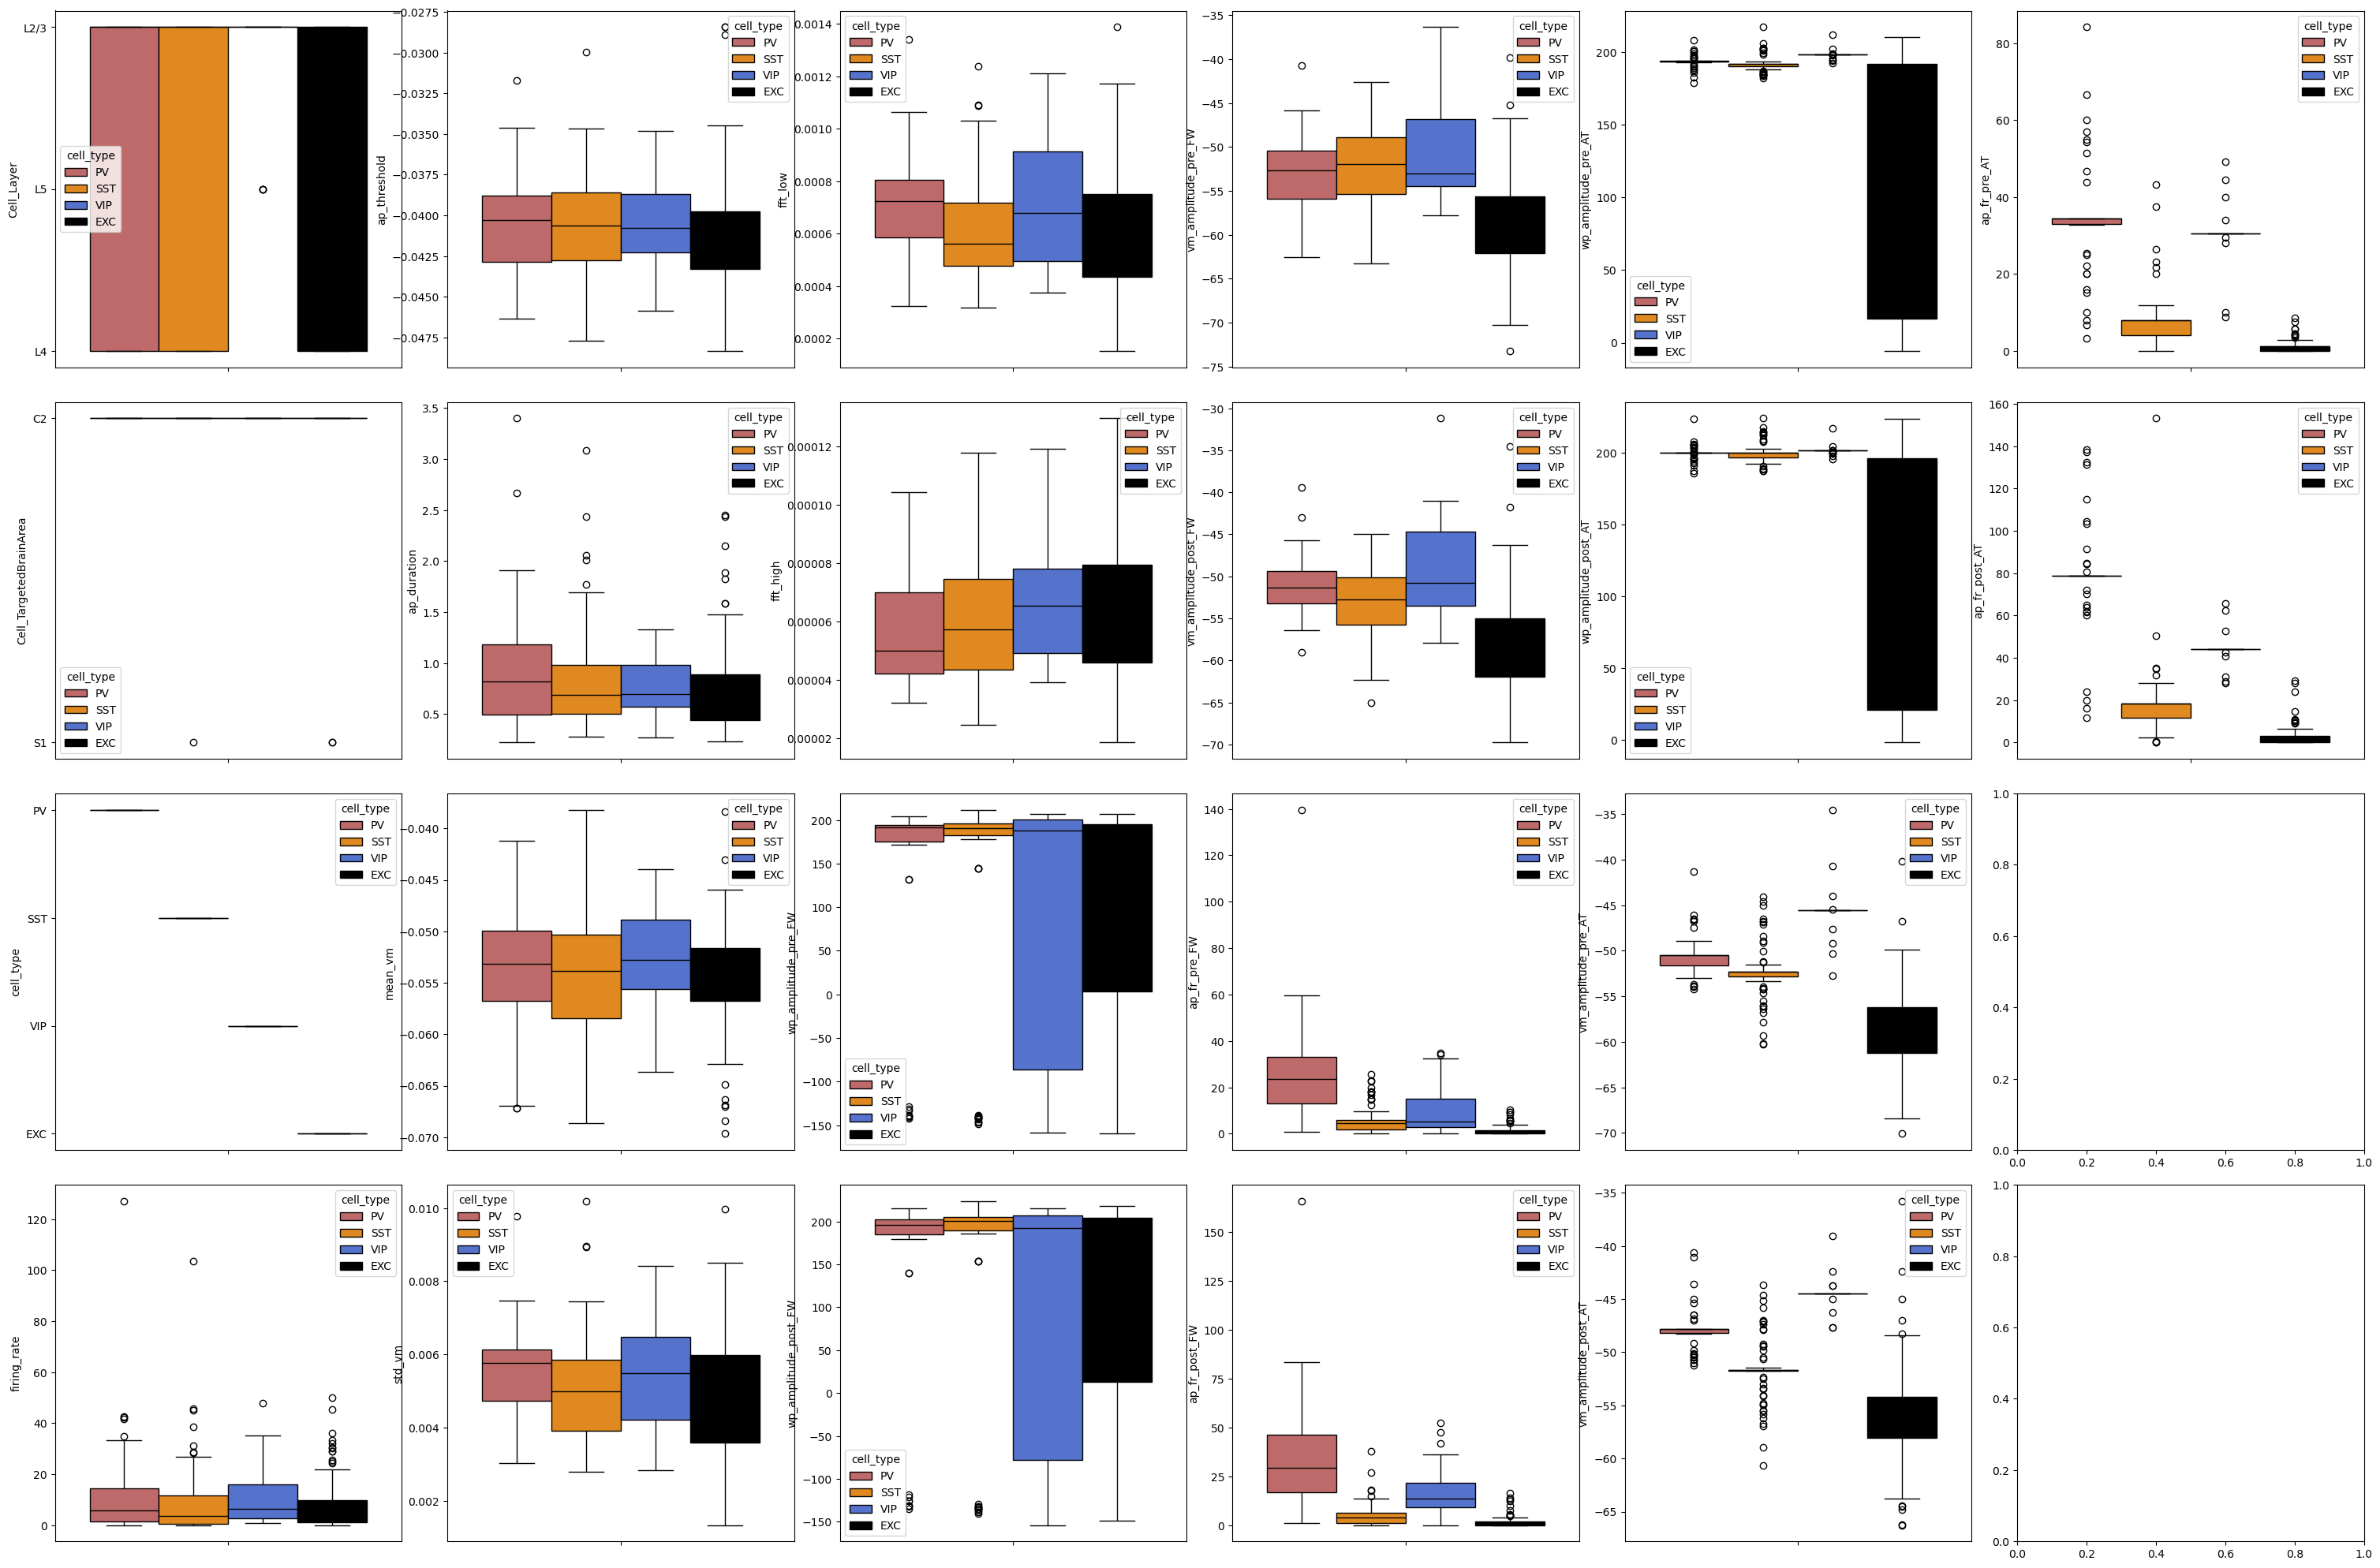

In [50]:
fig, axs= plt.subplots(4, 6, figsize = (30, 20))
fig.tight_layout()

col_to_plot = list(data.columns[2:]).copy()

for i, col in enumerate(col_to_plot):

    sns.boxplot(data,y= col, ax=axs[int(i%4)][int(i/4)], hue = 'cell_type', palette=class_color)

#### Class balance

<Axes: xlabel='cell_type', ylabel='Count'>

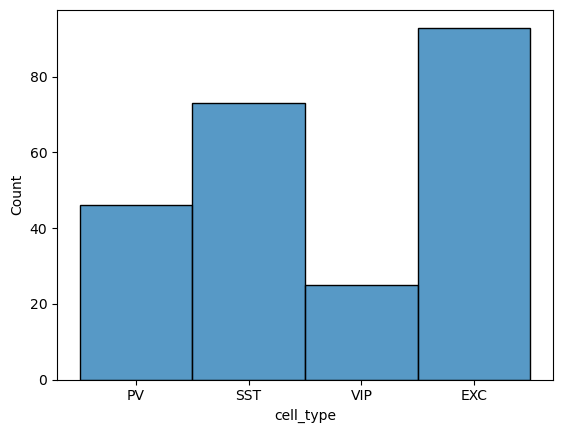

In [51]:
sns.histplot(data['cell_type'])

##### Transform categorical data into numerical ones with dummies 

In [381]:
######## Class label ###########
y = data.cell_type

# Numerical encoding 

label_map = {'EXC':0,'PV' : 10, 'VIP' : 11, 'SST' :12} # you can change the label as you prefer here
y_all = y.map(label_map)




######## Feature matrix ###########
X = data.copy()
X = X.drop(columns = ['cell_type', 'cell_id']) # drop the labels, drop the cell_id (we don't want them)

# Numerical encoding 
X = pd.get_dummies(X) * 1

In [382]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler


x_train_all, x_test_all, y_train_all, y_test_all = train_test_split(StandardScaler().fit_transform(X.to_numpy()), y_all.to_numpy(), test_size=0.2, stratify=y_all)
y_train_bin=np.where(y_train_all==0,0,1)
y_test_bin=np.where(y_test_all==0,0,1)

inhib_id_train=np.argwhere(y_train_all!=0).ravel()
inhib_id_test=np.argwhere(y_test_all!=0).ravel()
x_train_inhib=x_train_all[inhib_id_train]
y_train_inhib=y_train_all[inhib_id_train]
y_test_inhib=y_test_all[inhib_id_test]



In [383]:
print(x_train_all.shape)
print(y_train_bin.shape)

(189, 25)
(189,)


In [384]:
#classification weights
def weightsdet(y_train):
       # 1. Calculate the class frequencies (counts of each class)
       class_counts = Counter(y_train)
       total_samples = len(y_train)
       # 2. Calculate class weights based on the inverse of the class frequencies
       return {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

weights_bin=weightsdet(y_train_bin)
print(weights_bin)
weights_inhib=weightsdet(y_train_inhib)
print(weights_inhib)

{1: 0.8217391304347826, 0: 1.277027027027027}
{11: 1.9166666666666667, 12: 0.6609195402298851, 10: 1.0360360360360361}


## 3. PCA 

In [385]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca(x,y, component_vis=None, X_columns=X.columns, threshold=1):
    pca=PCA()
    x_pca=pca.fit_transform(x)
    print(pca.explained_variance_ratio_)
    # Plot the Scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
    plt.title('Scree Plot')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
    plt.grid(True)
    plt.show()

    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    print(cumulative_variance)
    plt.bar(x=range(1,len(cumulative_variance )+1),height=np.round(cumulative_variance* 100,decimals=1))
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Components')
    plt.title('Cumulative variance')   
    plt.show()  
    # Find the number of components needed to reach 98% explained variance
 
    num_components = np.argmax(cumulative_variance >= 1-1e-9) + 1 
    print(f"Number of components to retain {threshold*100}% variance: {num_components}")
    vis_comp= num_components if component_vis==None else component_vis
    if np.size(vis_comp)==1:
        x_vis=x_pca[:, :vis_comp] 
        pca_columns = [f'PC{i+1}' for i in range(vis_comp)]
    else:
        x_vis=x_pca[:, np.array(vis_comp)+1]
        pca_columns = [f'PC{i}' for i in vis_comp]
    # Create a DataFrame for the reduced PCA data
    
    X_pca_df = pd.DataFrame(x_vis, columns=pca_columns)

    display(X_pca_df)
    # Add the labels to the DataFrame
    X_pca_df['Label'] = y # Ensure 'y' is aligned with the data and categorical if needed

  
    # Pair plot
    sns.set(style="ticks")
    pairplot = sns.pairplot(X_pca_df, hue='Label', diag_kind='hist', palette='viridis', markers=['o', 's'])
    plt.show()
    pca_loadings = pca.components_[:num_components]  # Loadings for the retained components
    pca_loadings_df = pd.DataFrame(
        pca_loadings.T,  # Transpose to align features with components
        columns=[f'PC{i+1}' for i in range(num_components)],
        index=X_columns  # Use feature names as the index
    )

    low_contribution_threshold = 0.1
    low_contributing_features = pca_loadings_df[(pca_loadings_df.abs() < low_contribution_threshold).all(axis=1)]

    print("Low-contributing features:")
    print(low_contributing_features.index.tolist())

    plt.figure(figsize=(30, 10))
    sns.heatmap(pca_loadings_df, annot=True, cmap='coolwarm', cbar=True)
    plt.title("PCA Loadings (Feature Contributions)")
    plt.xlabel("Principal Components")
    plt.ylabel("Original Features")
    plt.show()

    return x_pca[:, :num_components],[X.columns.get_loc(feature) for feature in low_contributing_features.index.tolist() if feature in X.columns], pca




[2.25367901e-01 1.52075776e-01 1.14066766e-01 1.00030704e-01
 7.22313714e-02 6.15503927e-02 5.78911199e-02 5.04085900e-02
 4.34684979e-02 3.59396412e-02 1.98608422e-02 1.83052915e-02
 1.34761684e-02 8.04827333e-03 6.70128640e-03 6.22904760e-03
 5.30264741e-03 4.13192203e-03 1.95747261e-03 1.54741151e-03
 1.35368440e-03 3.25481620e-05 2.26441047e-05 1.75121559e-33
 1.09065089e-33]


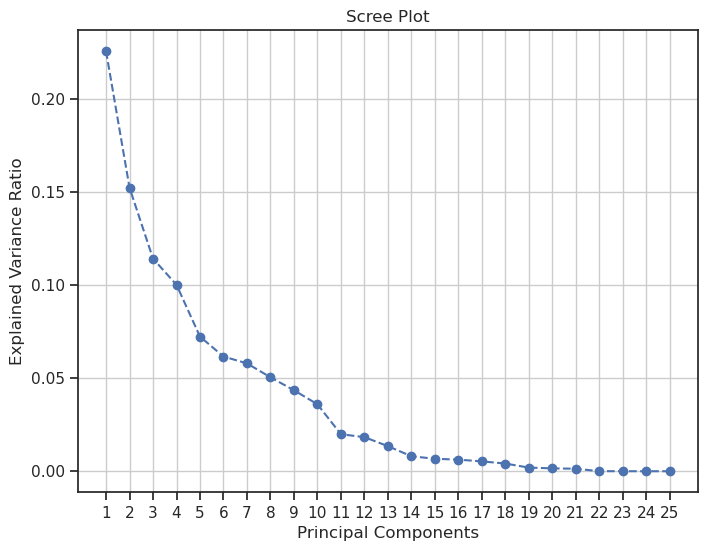

[0.2253679  0.37744368 0.49151044 0.59154115 0.66377252 0.72532291
 0.78321403 0.83362262 0.87709112 0.91303076 0.9328916  0.95119689
 0.96467306 0.97272134 0.97942262 0.98565167 0.99095432 0.99508624
 0.99704371 0.99859112 0.99994481 0.99997736 1.         1.
 1.        ]


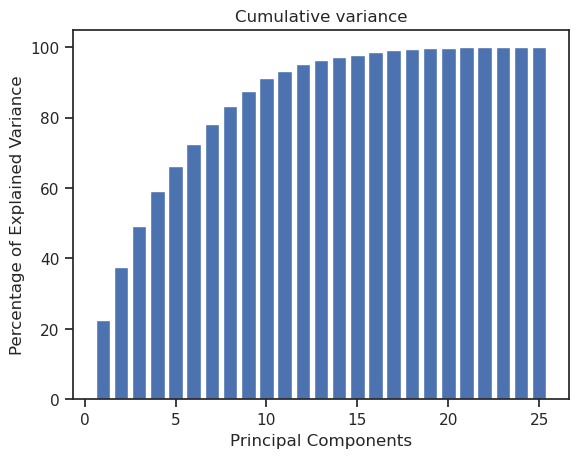

Number of components to retain 100% variance: 23


,PC1,PC2
0,2.612033,-2.904730
1,2.756645,1.788399
2,3.032486,-0.119206
3,3.900435,0.300496
4,0.535501,1.731944
...,...,...
184,-0.829254,0.143229
185,3.199583,-2.747140
186,1.660567,-2.457469
187,1.543199,-0.195080


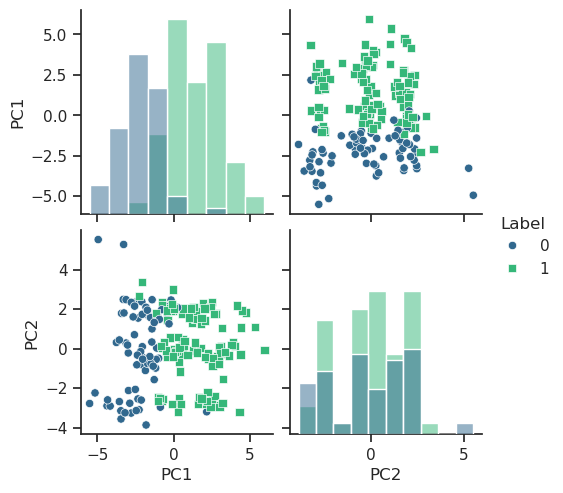

Low-contributing features:
[]


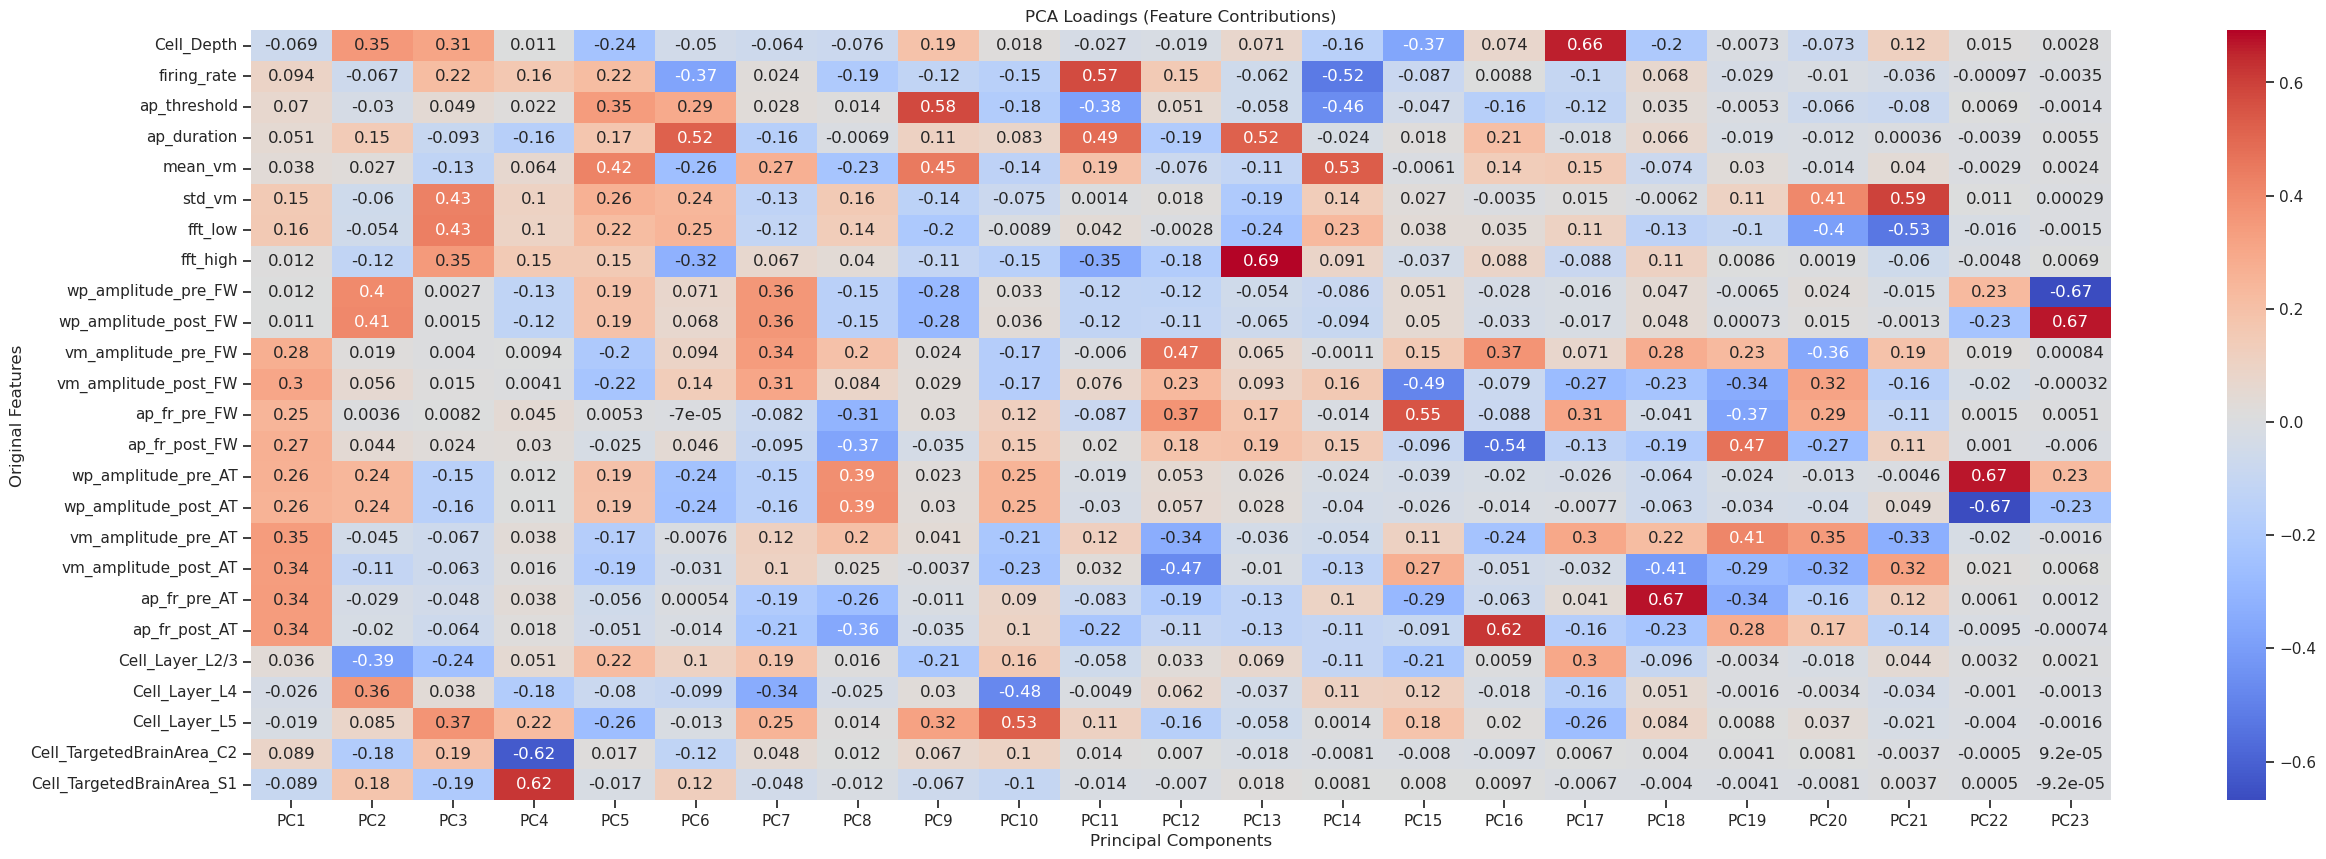

In [386]:
x_pca_bin, low_feat_bin, pca_all=pca(x_train_all,y_train_bin, component_vis=2,threshold=1)
x_test_pca_bin=pca_all.transform(x_test_all)[:,:23]

[1.97344743e-01 1.90501466e-01 1.24726370e-01 9.59872015e-02
 7.86103839e-02 6.81109067e-02 5.98203187e-02 3.91359945e-02
 2.92045732e-02 2.81641722e-02 2.46933181e-02 1.67482901e-02
 1.13411159e-02 1.03473974e-02 8.59109613e-03 6.77979977e-03
 4.43035324e-03 2.04045874e-03 1.92303484e-03 9.06261074e-04
 5.43279131e-04 2.81600247e-05 2.13055235e-05 1.72129889e-33
 1.26828331e-34]


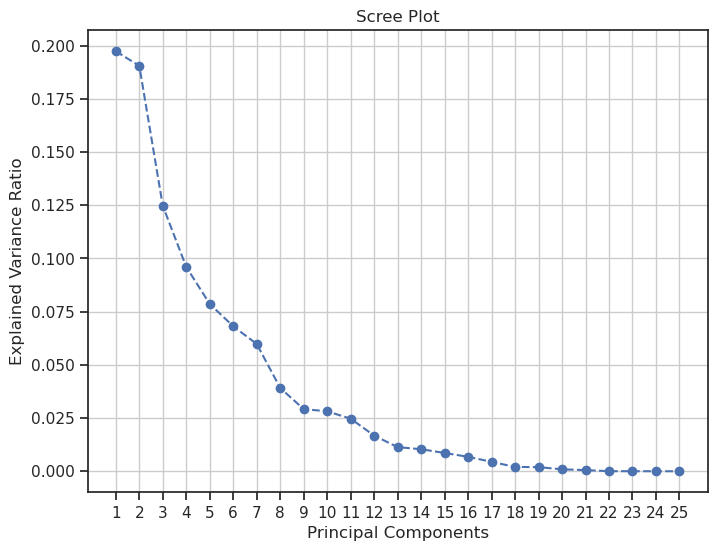

[0.19734474 0.38784621 0.51257258 0.60855978 0.68717016 0.75528107
 0.81510139 0.85423738 0.88344196 0.91160613 0.93629945 0.95304774
 0.96438885 0.97473625 0.98332735 0.99010715 0.9945375  0.99657796
 0.99850099 0.99940726 0.99995053 0.99997869 1.         1.
 1.        ]


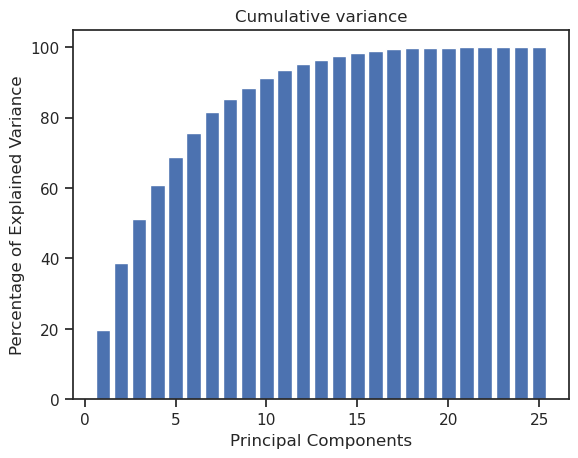

Number of components to retain 100% variance: 23


,PC1,PC13
0,1.564948,0.040795
1,-0.115079,0.318720
2,-2.168438,-0.132105
3,-2.047306,0.141580
4,1.402488,-0.348921
...,...,...
110,0.179965,-0.023381
111,-0.542373,0.197213
112,-1.024308,0.345409
113,2.076694,-0.616676


/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


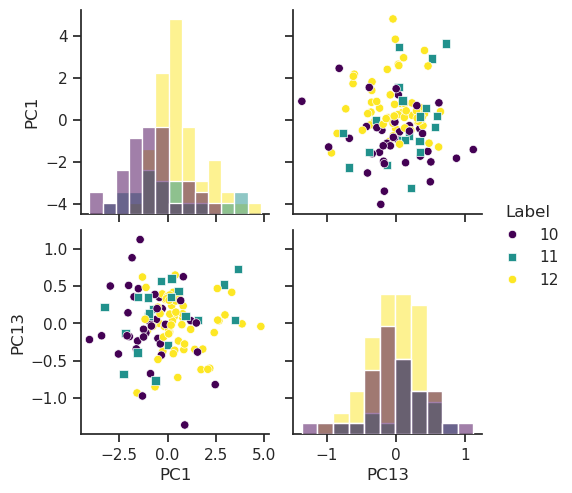

Low-contributing features:
[]


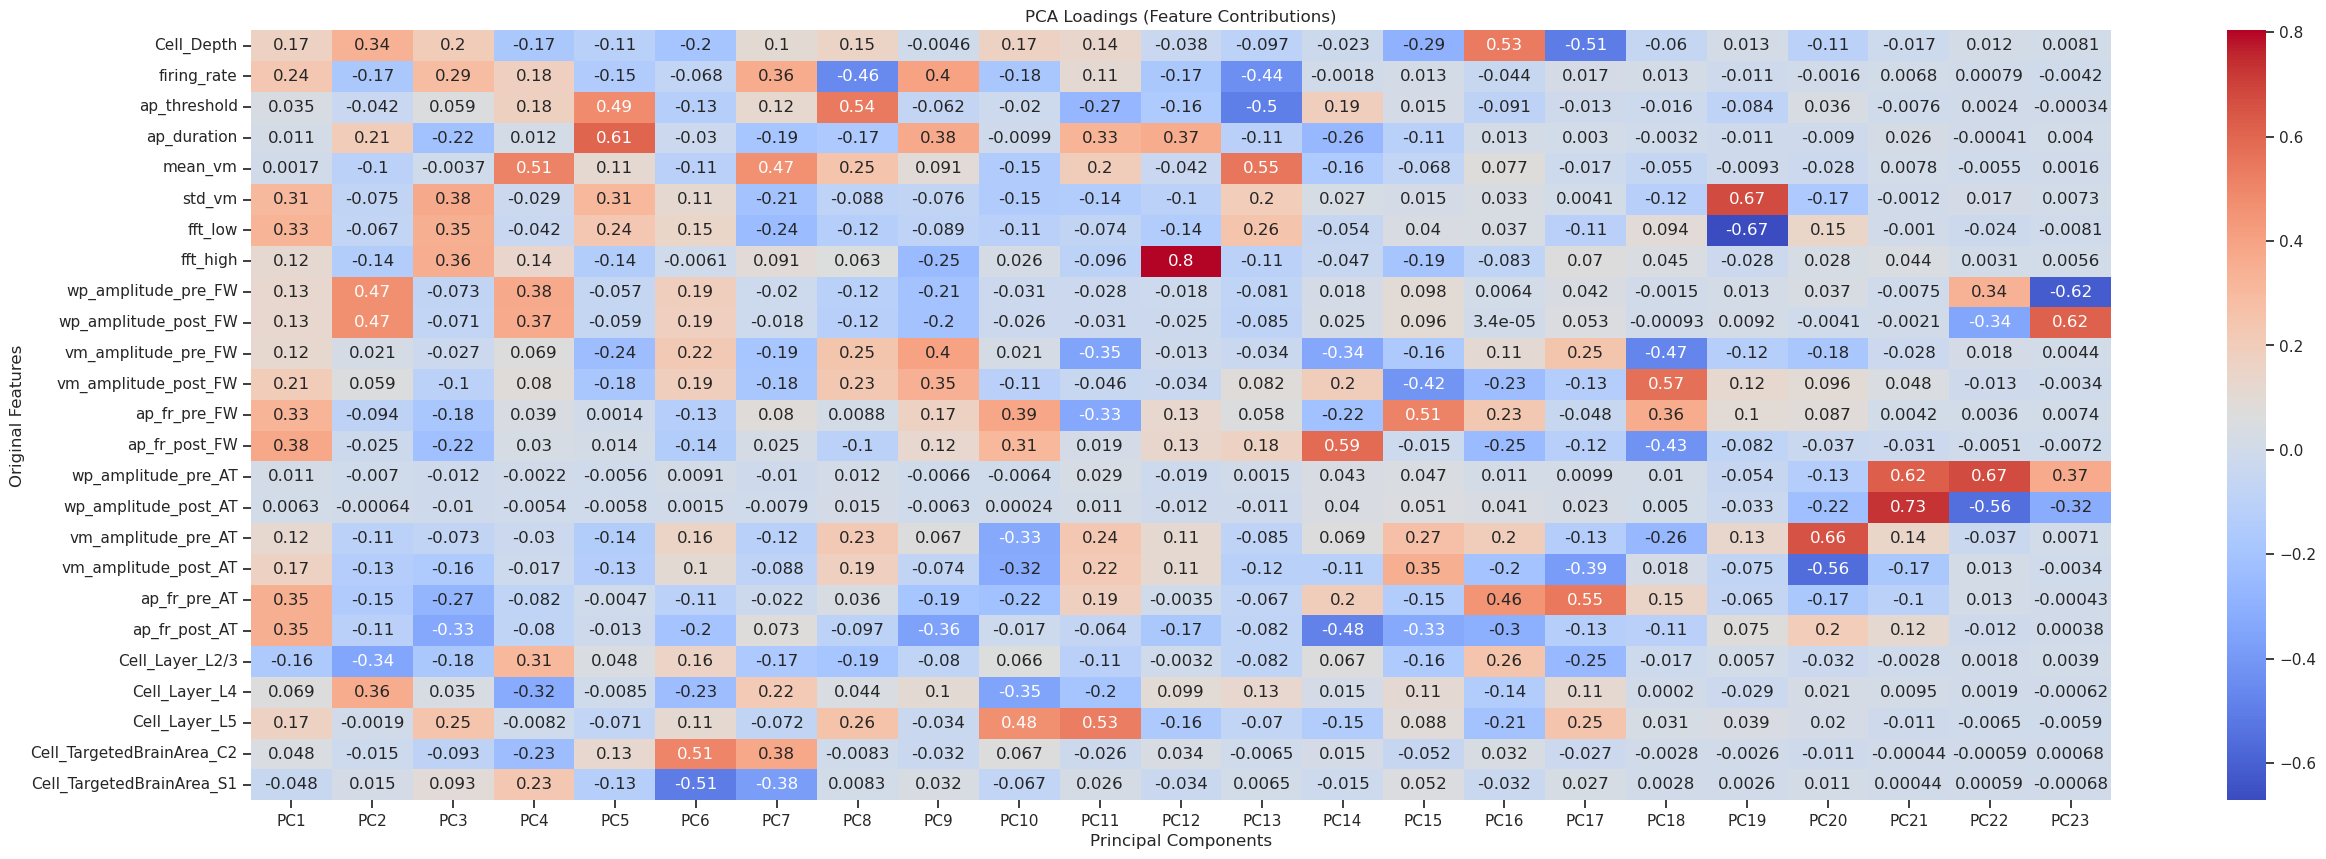

In [387]:
x_pca_inhib,  low_feat_inhib,_=pca(x_train_inhib,y_train_inhib, component_vis=[1,13])

[1.97344743e-01 1.90501466e-01 1.24726370e-01 9.59872015e-02
 7.86103839e-02 6.81109067e-02 5.98203187e-02 3.91359945e-02
 2.92045732e-02 2.81641722e-02 2.46933181e-02 1.67482901e-02
 1.13411159e-02 1.03473974e-02 8.59109613e-03 6.77979977e-03
 4.43035324e-03 2.04045874e-03 1.92303484e-03 9.06261074e-04
 5.43279131e-04 2.81600247e-05 2.13055235e-05 3.14993980e-33
 7.10139108e-34]


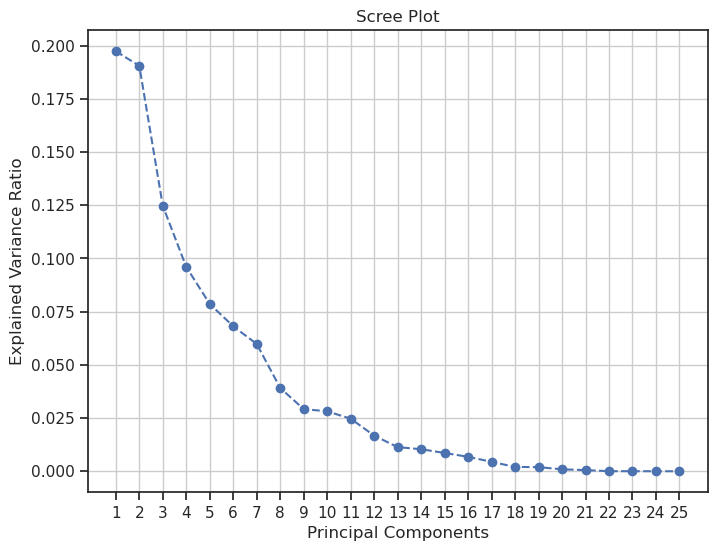

[0.19734474 0.38784621 0.51257258 0.60855978 0.68717016 0.75528107
 0.81510139 0.85423738 0.88344196 0.91160613 0.93629945 0.95304774
 0.96438885 0.97473625 0.98332735 0.99010715 0.9945375  0.99657796
 0.99850099 0.99940726 0.99995053 0.99997869 1.         1.
 1.        ]


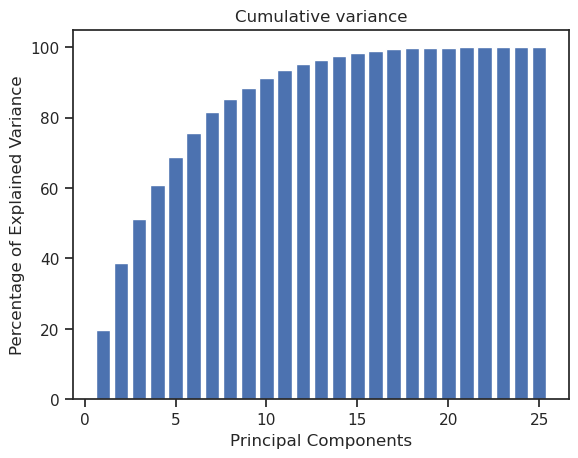

Number of components to retain 100% variance: 23


,PC1,PC2
0,0.796356,-3.167226
1,1.675939,1.574548
2,0.262169,-0.131649
3,2.589370,0.008328
4,-0.014851,1.776530
...,...,...
110,-2.190367,0.711545
111,1.029836,-3.349983
112,-1.352161,-2.856201
113,0.542044,-0.047447


/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


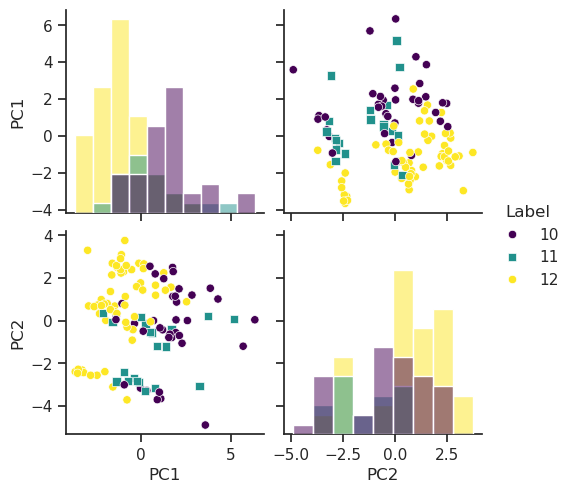

Low-contributing features:
[]


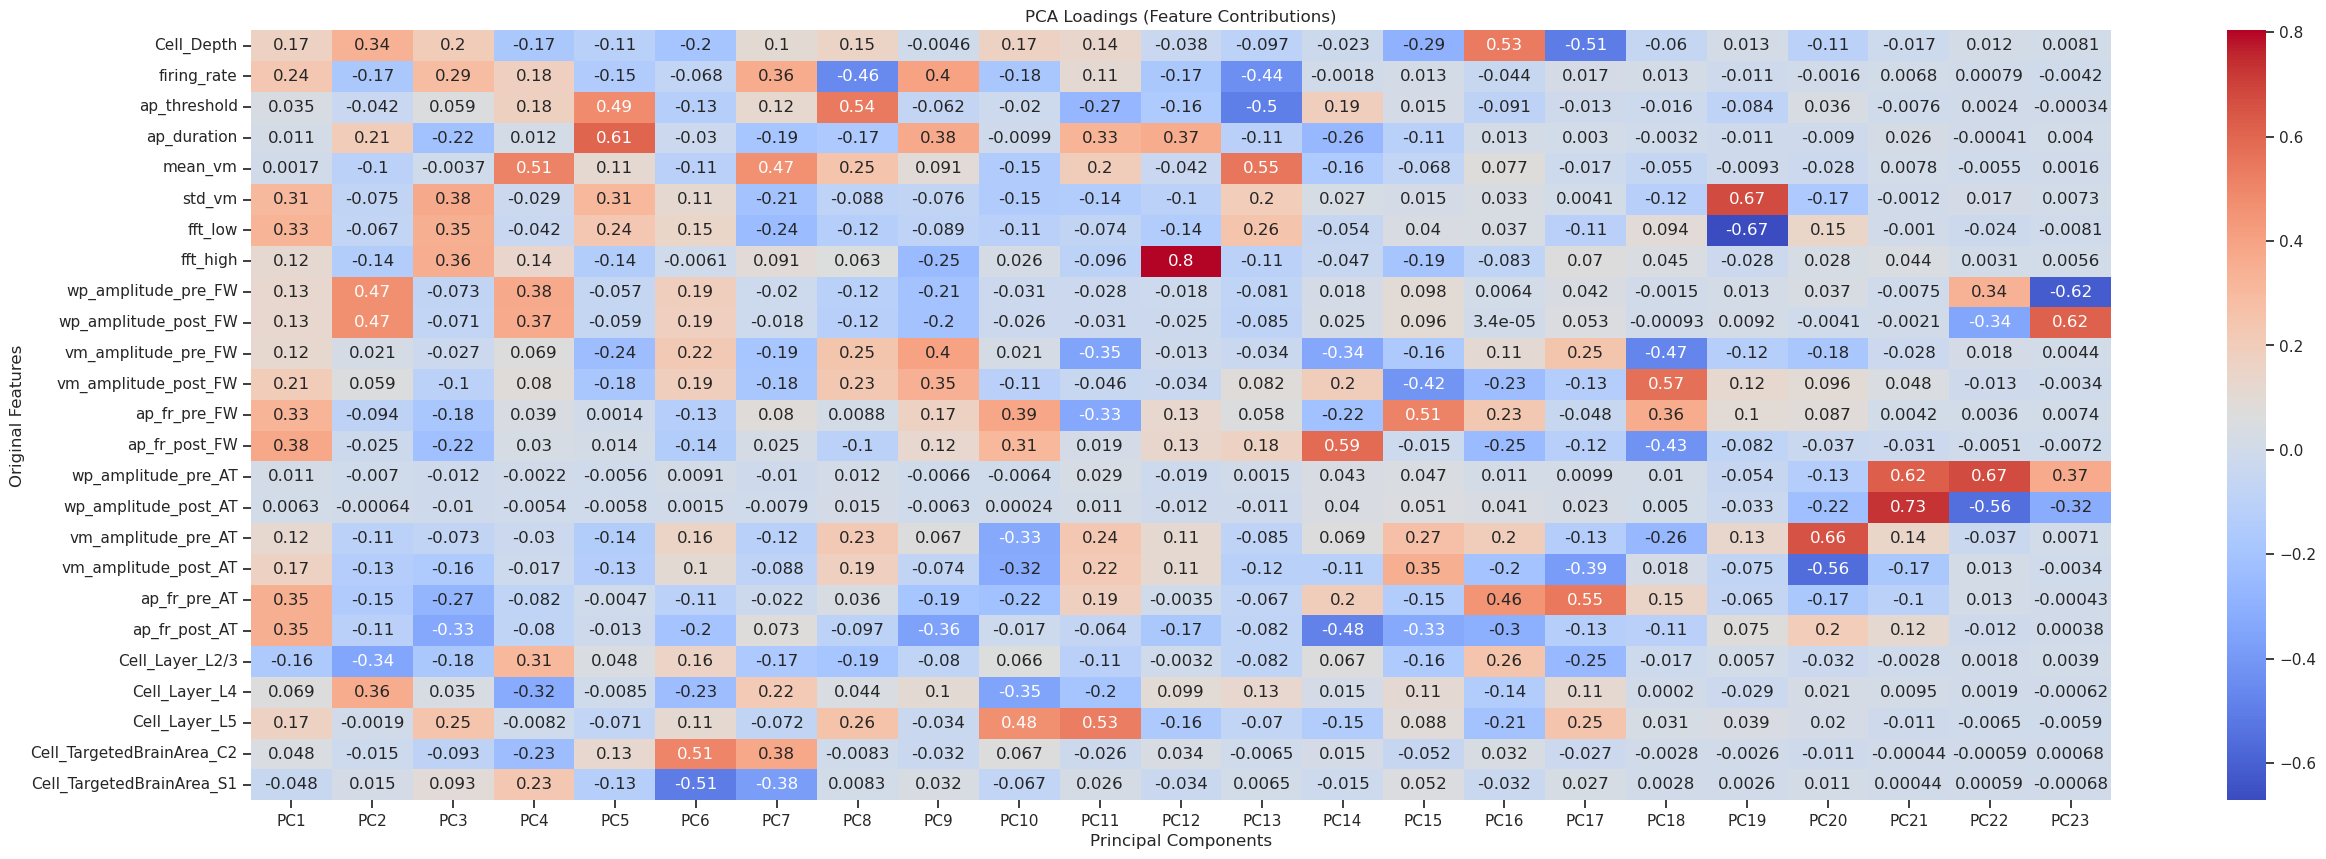

In [388]:
x_pca_inhib, _, pca_inhib=pca(np.delete(x_train_inhib, low_feat_inhib, axis=1),y_train_inhib, component_vis=2, X_columns=np.delete(X.columns, low_feat_inhib))
x_pca_inhib_all=pca_inhib.transform(np.delete(x_train_all, low_feat_inhib, axis=1))[:,:23]
x_test_pca_inhib=pca_all.transform(np.delete(x_test_all, low_feat_inhib, axis=1))[:,:23]

## LDA

In [389]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def lda(x,y, component_vis=None, X_columns=X.columns):
    lda=LDA()
    x_lda=lda.fit_transform(x,y)
    
    if x_lda.shape[1]>1:
        X_lda_df = pd.DataFrame(x_lda, columns=[f'C{i+1}' for i in range(x_lda.shape[1])])

        display(X_lda_df)
        # Add the labels to the DataFrame
        X_lda_df['Label'] = y # Ensure 'y' is aligned with the data and categorical if needed

    
        # Pair plot
        sns.set(style="ticks")
        pairplot = sns.pairplot(X_lda_df, hue='Label', diag_kind='hist', palette='viridis', markers=['o', 's'])
        plt.show()
    return x_lda



In [390]:
x_lda_bin=lda(x_train_all,y_train_bin, component_vis=None, X_columns=X.columns)
display(x_lda_bin)

array([[-1.86388202],
       [-2.17965912],
       [-1.91470612],
       [-2.37458151],
       [-0.62196797],
       [-1.04851475],
       [-0.28205405],
       [-3.2299024 ],
       [ 0.20951923],
       [ 1.38084079],
       [ 2.08286293],
       [ 2.35999357],
       [-0.95934938],
       [-1.46317683],
       [ 1.88975307],
       [ 3.97722583],
       [-1.45933024],
       [-2.38825085],
       [-2.94039167],
       [-0.94791723],
       [-2.00773138],
       [-2.10964083],
       [ 0.33155332],
       [ 3.00665825],
       [-1.59627301],
       [-0.32070799],
       [ 1.36080566],
       [-1.92311854],
       [ 2.41210941],
       [-0.59464197],
       [-0.63402795],
       [-0.19728456],
       [-0.33158162],
       [ 0.99077481],
       [-1.32434859],
       [-1.36669189],
       [ 3.83792369],
       [-1.1467459 ],
       [ 1.92818564],
       [ 4.98701098],
       [-1.01407125],
       [-0.05808687],
       [-1.74854714],
       [-1.2045854 ],
       [ 2.22957229],
       [ 3

,C1,C2
0,3.509388,2.343354
1,-1.370170,0.045644
2,2.529716,2.753408
3,2.140969,-1.656207
4,-2.376356,0.713395
...,...,...
110,-2.158436,-0.566520
111,1.819468,-1.726939
112,2.529088,2.903985
113,-2.193838,0.284377


/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/home/ricard/anaconda3/envs/neuro/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


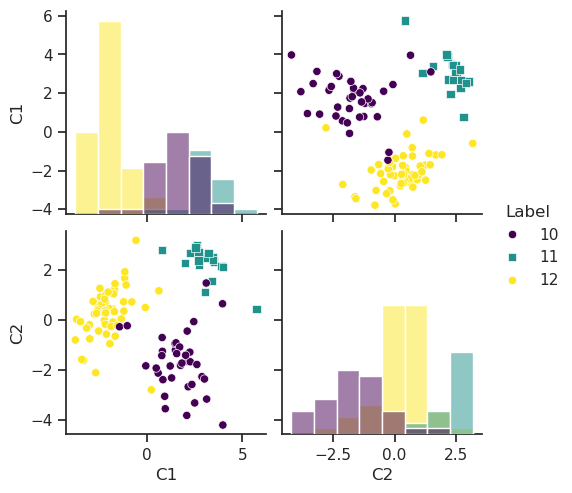

In [391]:
x_lda_inhib=lda(x_train_inhib,y_train_inhib, component_vis=None, X_columns=X.columns)

# Classification

In [392]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## hyperparameter selection

In [393]:
from sklearn.model_selection import GridSearchCV

### first

In [394]:

param_grid_svc = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.001, 0.01, 0.1, 1, 10,100],
    'gamma': [0.0001, 0.001, 0.01, 0.1]  # Used for 'rbf' and 'poly'
}

svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(x_train_all,y_train_bin)  # Replace X, y with your data
svc_params=grid_search_svc.best_params_
print(svc_params, x_train_all.shape)
grid_search_svc.fit(x_pca_bin,y_train_bin)
svc_params_pca=grid_search_svc.best_params_
print(svc_params_pca, x_pca_bin.shape)
grid_search_svc.fit(x_lda_bin,y_train_bin)
svc_params_lda=grid_search_svc.best_params_
print(svc_params_lda, x_lda_bin.shape)

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'} (189, 25)
{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'} (189, 23)
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} (189, 1)


In [395]:
print(cross_val_score(SVC(**svc_params),x_train_all,y_train_bin, cv=5).mean())
print(cross_val_score(SVC(**svc_params_pca),x_pca_bin,y_train_bin, cv=5).mean())
print(cross_val_score(SVC(**svc_params_lda),x_lda_bin,y_train_bin,cv=5).mean())

0.9469416785206259
0.9469416785206259
0.947226173541963


In [396]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 10, 20,30,40,50,100],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_all,y_train_bin) 
knn_params=grid_search_knn.best_params_
print(knn_params, x_train_all.shape)
grid_search_knn.fit(x_pca_bin,y_train_bin)
knn_params_pca=grid_search_knn.best_params_
print(knn_params_pca, x_pca_bin.shape)
grid_search_knn.fit(x_lda_bin,y_train_bin)
knn_params_lda=grid_search_knn.best_params_
print(knn_params_lda, x_lda_bin.shape)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'} (189, 25)
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'} (189, 23)
{'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'} (189, 1)


In [397]:
print(cross_val_score(KNeighborsClassifier(**knn_params),x_train_all,y_train_bin, cv=5).mean())
print(cross_val_score(KNeighborsClassifier(**knn_params_pca),x_pca_bin,y_train_bin, cv=5).mean())
print(cross_val_score(KNeighborsClassifier(**knn_params_lda),x_lda_bin,y_train_bin, cv=5).mean())

0.9364153627311523
0.9048364153627311
0.947226173541963


### 2nd

In [398]:
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 10,20,30,],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train_inhib,y_train_inhib) 
knn_params_inhib=grid_search_knn.best_params_
print(knn_params_inhib, x_train_inhib.shape)
grid_search_knn.fit(x_pca_inhib,y_train_inhib)
knn_params_pca_inhib=grid_search_knn.best_params_
print(knn_params_pca_inhib, x_pca_inhib.shape)
grid_search_knn.fit(x_lda_inhib,y_train_inhib)
knn_params_lda_inhib=grid_search_knn.best_params_
print(knn_params_lda_inhib, x_lda_inhib.shape)

{'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'} (115, 25)
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'} (115, 23)
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'} (115, 2)


In [399]:
print(cross_val_score(KNeighborsClassifier(**knn_params_inhib),x_train_inhib,y_train_inhib, cv=5).mean())
print(cross_val_score(KNeighborsClassifier(**knn_params_pca_inhib),x_pca_inhib,y_train_inhib, cv=5).mean())
print(cross_val_score(KNeighborsClassifier(**knn_params_lda_inhib),x_lda_inhib,y_train_inhib, cv=5).mean())

0.8608695652173914
0.8347826086956521
0.9565217391304348


## Trainning

In [400]:
train_svc=SVC(**svc_params,class_weight=weights_bin, probability=True)
train_svc.fit(x_train_all,y_train_bin)
train_svc_pca=SVC(**svc_params_pca,class_weight=weights_bin,probability=True)
train_svc_pca.fit(x_pca_bin,y_train_bin)
train_svc_lda=SVC(**svc_params_lda,class_weight=weights_bin,probability=True)
train_svc_lda.fit(x_lda_bin,y_train_bin)

SVC(C=1, class_weight={0: 1.277027027027027, 1: 0.8217391304347826}, gamma=0.1,
    probability=True)

In [401]:
train_knn=KNeighborsClassifier(**knn_params)
train_knn.fit(x_train_all,y_train_bin)
train_knn_pca=KNeighborsClassifier(**knn_params_pca)
train_knn_pca.fit(x_pca_bin,y_train_bin)
train_knn_lda=KNeighborsClassifier(**knn_params_lda)
train_knn_lda.fit(x_lda_bin,y_train_bin)

KNeighborsClassifier(metric='euclidean', n_neighbors=20)

In [402]:
train_knn_inhib=KNeighborsClassifier(**knn_params_inhib)
train_knn_inhib.fit(x_train_inhib,y_train_inhib)
train_knn_pca_inhib=KNeighborsClassifier(**knn_params_pca_inhib)
train_knn_pca_inhib.fit(x_pca_inhib,y_train_inhib)
train_knn_lda_inhib=KNeighborsClassifier(**knn_params_lda_inhib)
train_knn_lda_inhib.fit(x_lda_inhib,y_train_inhib)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## Classification

In [403]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

0.9779735682819384
0.9779735682819384
0.9572649572649573


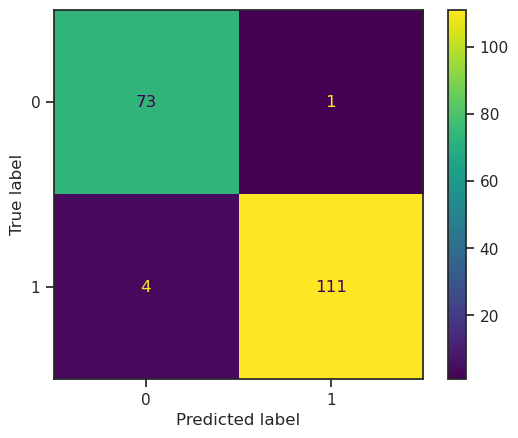

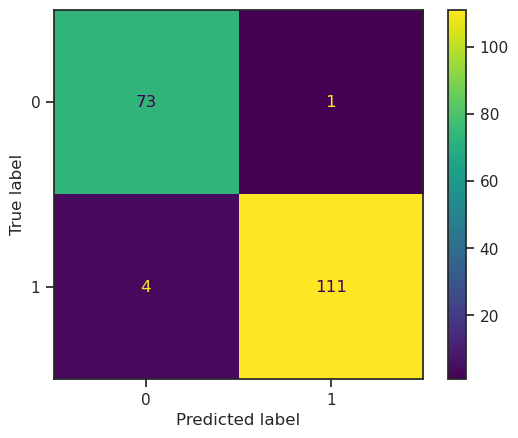

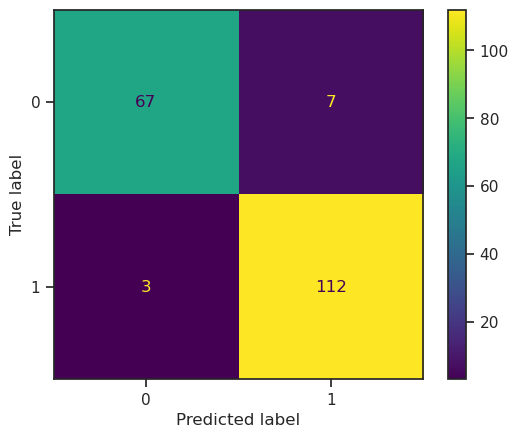

In [404]:
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_svc.predict(x_train_all))).plot()
print(f1_score(y_train_bin,train_svc.predict(x_train_all)))
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_svc_pca.predict(x_pca_bin))).plot()
print(f1_score(y_train_bin,train_svc_pca.predict(x_pca_bin)))
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_svc_lda.predict(x_lda_bin))).plot()
print(f1_score(y_train_bin,train_svc_lda.predict(x_lda_bin)))

0.9606986899563319
0.9527896995708155
0.9572649572649573


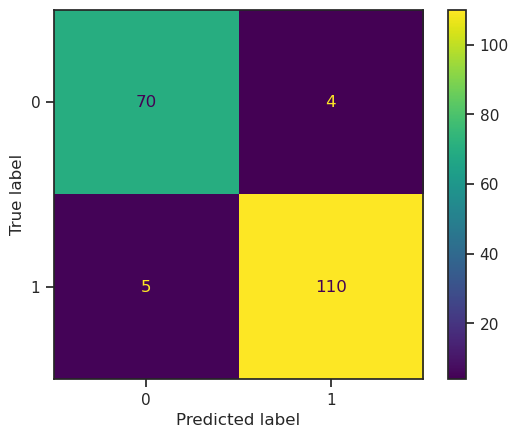

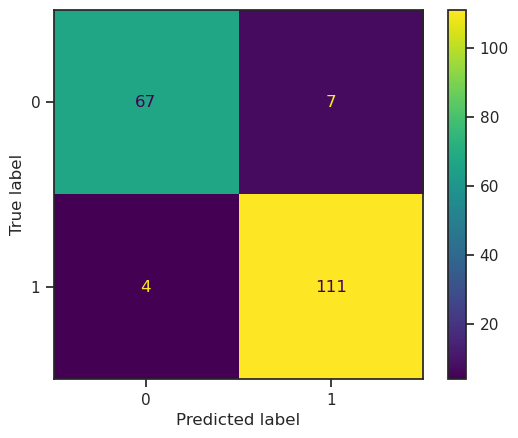

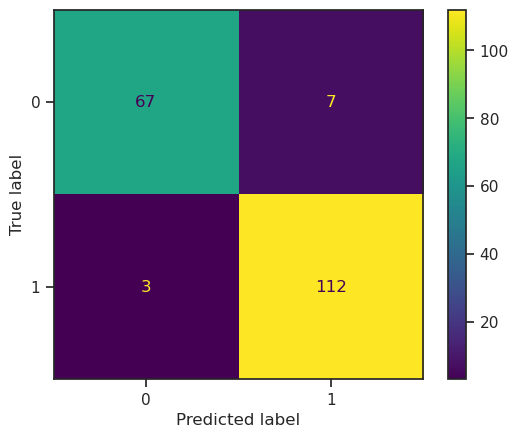

In [405]:
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_knn.predict(x_train_all))).plot()
print(f1_score(y_train_bin,train_knn.predict(x_train_all)))
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_knn_pca.predict(x_pca_bin))).plot()
print(f1_score(y_train_bin,train_knn_pca.predict(x_pca_bin)))
ConfusionMatrixDisplay(confusion_matrix(y_train_bin,train_knn_lda.predict(x_lda_bin))).plot()
print(f1_score(y_train_bin,train_knn_lda.predict(x_lda_bin)))

1.0
1.0
0.9652173913043478


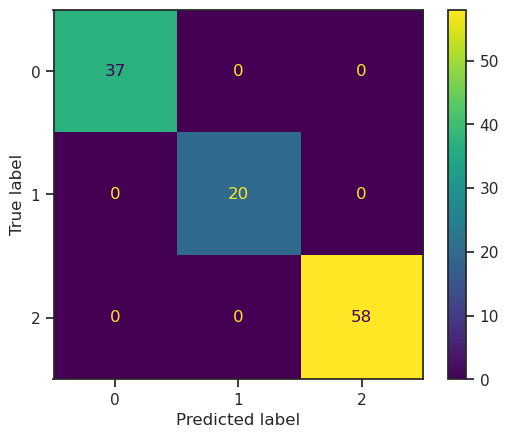

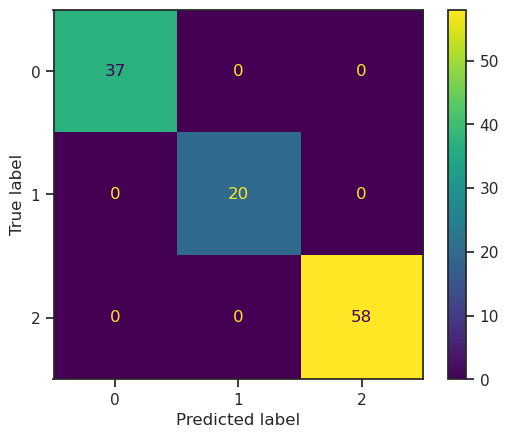

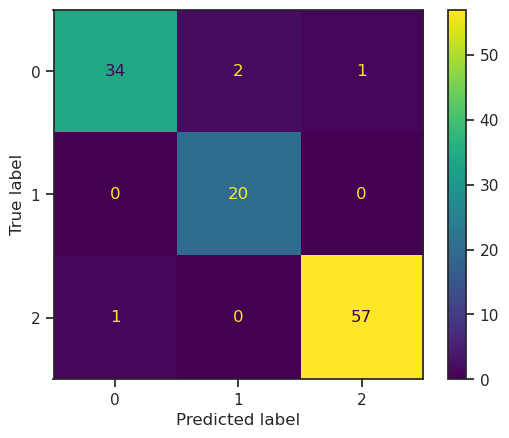

In [406]:
ConfusionMatrixDisplay(confusion_matrix(y_train_inhib,train_knn_inhib.predict(x_train_inhib))).plot()
print(f1_score(y_train_inhib,train_knn_inhib.predict(x_train_inhib), average='micro'))
ConfusionMatrixDisplay(confusion_matrix(y_train_inhib,train_knn_pca_inhib.predict(x_pca_inhib))).plot()
print(f1_score(y_train_inhib,train_knn_pca_inhib.predict(x_pca_inhib),average='micro'))
ConfusionMatrixDisplay(confusion_matrix(y_train_inhib,train_knn_lda_inhib.predict(x_lda_inhib))).plot()
print(f1_score(y_train_inhib,train_knn_lda_inhib.predict(x_lda_inhib),average='micro'))

### overall algo prediction

0.9735449735449735

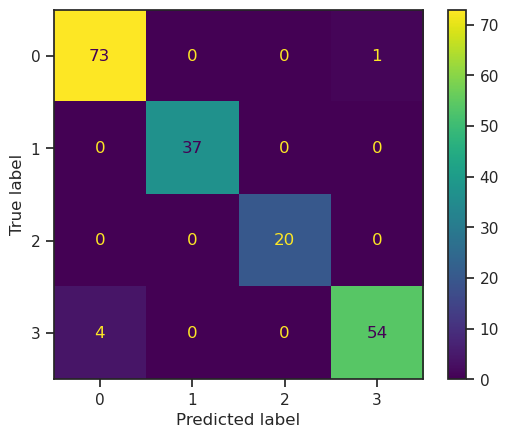

In [407]:
y_pred=train_svc_pca.predict(x_pca_bin)
id_pred=np.where(y_pred==1)[0]
y_pred[id_pred]=train_knn_pca_inhib.predict(x_pca_inhib_all[id_pred])
ConfusionMatrixDisplay(confusion_matrix(y_train_all,y_pred)).plot()
f1_score(y_train_all,y_pred, average='micro')

# TEST prediction

0.6458333333333334

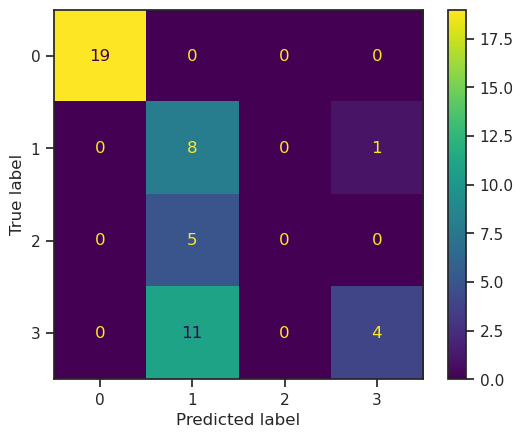

In [410]:
y_pred=train_svc_pca.predict(x_test_pca_bin)
id_pred=np.where(y_pred==1)[0]
y_pred[id_pred]=train_knn_pca_inhib.predict(x_test_pca_inhib[id_pred])
ConfusionMatrixDisplay(confusion_matrix(y_test_all,y_pred)).plot()
f1_score(y_test_all,y_pred, average='micro')